In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import random
import numpy as np
import os
import pickle as pkl
from itertools import permutations
%matplotlib inline

In [2]:
jpid="00680001"
df=pd.read_csv("~/Desktop/Summer Project/Linear Model/clean_data/"+jpid+"_clean.csv")

In [3]:
# sns.set(style="white")
cols=['Hours','StopSeq','Cumulative Time Taken','WeekDay']
df[cols].corr()

# mask = np.zeros_like(correlations, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# f, ax = plt.subplots(figsize=(8, 5))
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# sns.heatmap(correlations, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
#             square=True, xticklabels=True, yticklabels=True,
#             linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
# plt.yticks(rotation = 0)
# plt.xticks(rotation = 90)

,Hours,StopSeq,Cumulative Time Taken,WeekDay
Hours,1.000000,0.035671,0.127731,0.033772
StopSeq,0.035671,1.000000,0.974962,-0.002944
Cumulative Time Taken,0.127731,0.974962,1.000000,-0.035652
WeekDay,0.033772,-0.002944,-0.035652,1.000000


In [4]:
# replacing '-' visibility entries with average visibility of the rest of the df
avg_vis=np.mean((df[df['Visibility (km)']!='-'])['Visibility (km)'].astype(np.float32))
df.loc[df['Visibility (km)']=='-','Visibility (km)']=avg_vis
df['Visibility (km)']=df['Visibility (km)'].astype(np.float32)

In [5]:
# replacing 'Calm' entries in wind speed with 0
df.loc[df['Wind Speed (km/h)']=='Calm','Wind Speed (km/h)']=0
df['Wind Speed (km/h)']=df['Wind Speed (km/h)'].astype(np.float32)

In [6]:
# day of week and hour are categorical not continuous
df['WeekDay']=df['WeekDay'].astype(object)
df['Hours']=df['Hours'].astype(object)

In [7]:
# swapping 64 bit fields for 32 bit ones
for col in list(df):
    if df[col].dtype=='int64':
        df[col]=df[col].astype(np.int32)
    elif df[col].dtype=='float64':
        df[col]=df[col].astype(np.float32)

In [8]:
# wtf i dunno
df=df[df['Cumulative Time Taken']>=0]
df.dtypes

Unnamed: 0                 int32
Year                       int32
Month                      int32
Day                        int32
Hours                     object
Minute                     int32
Second                     int32
WeekDay                   object
Timestamp                  int32
VehicleJourneyID           int32
StopID                     int32
Temperature (C)            int32
Visibility (km)          float32
Wind Speed (km/h)        float32
Conditions                object
StopSeq                    int32
Cumulative Time Taken    float32
dtype: object

In [9]:
df['WeekDay']=df['WeekDay'].astype(object)
df['Hours']=df['Hours'].astype(object)

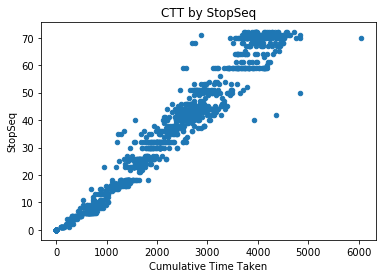

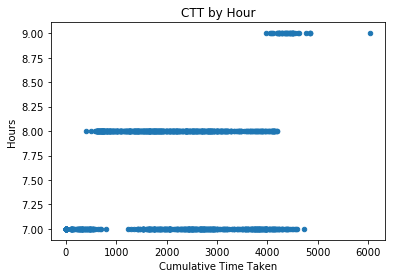

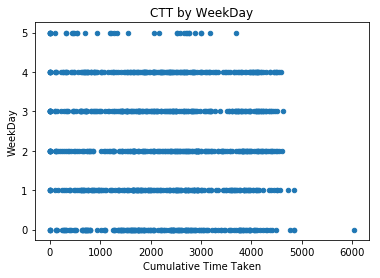

In [10]:
df.plot(x='Cumulative Time Taken', y='StopSeq', kind='scatter',title='CTT by StopSeq')
df.plot(x='Cumulative Time Taken', y='Hours', kind='scatter',title='CTT by Hour')
df.plot(x='Cumulative Time Taken', y='WeekDay', kind='scatter',title='CTT by WeekDay')

### Test on full df

In [1142]:
linreg_df=df[df['StopSeq']!=0]
train, test = train_test_split(linreg_df, test_size = 0)

In [1143]:
X_train = train[['StopSeq','WeekDay','Hours']]
y_train = train['Cumulative Time Taken']

In [1144]:
ols=linear_model.LinearRegression()

In [1145]:
model=ols.fit(X_train,y_train)

In [1146]:
model.score(X_train, y_train)

0.90159750895229263

In [1147]:
t={'StopSeq':[65],'WeekDay':[6],'Hours':[20]}
please=pd.DataFrame.from_dict(t)
please=please[['StopSeq','WeekDay','Hours']]
model.predict(please)

array([ 4595.65958725])

In [1148]:
t={'StopSeq':[5],'WeekDay':[0],'Hours':[21]}

please=pd.DataFrame.from_dict(t)
please=please[['StopSeq','WeekDay','Hours']]
please
model.predict(please)

array([ 821.0291145])

In [1150]:
rms = (mean_squared_error(y_train, model.predict(X_train)))**0.5

NameError: name 'mean_squared_error' is not defined

In [883]:
pkl.dump(model,open('pickle_files/'+jpid+'.pkl','wb'),pkl.HIGHEST_PROTOCOL)

In [844]:
with open("pickle_files/"+jpid+".pkl", "rb") as input_file: # loading pickle file
    data=pkl.load(input_file)
    a=data.predict(test_row)[0] # predicting test_row  to test pickle file
    print(a)

689.358943101


In [586]:
# required_cols=['StopSeq','WeekDay','Hours']
# optional_extras=['Day','Month','Temperature (C)','Visibility (km)','Wind Speed (km/h)']
# possible_combos=[]
# for i in range(len(optional_extras)+1):
#     for subset in permutations(optional_extras, i):
#             new=required_cols
#             new.append(list(subset))
#             print(new)
# #             if new not in possible_combos:
# #                 possible_combos.append(new)
# # combo_accuracy={}
# # for combo in possible_combos:
#     print(combo)
# # train_test_coeffs={}
# # test_sizes=[.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]
# # for size in test_sizes:
# #     train, test = train_test_split(df, test_size = size)

# #     model_scores={}
    
# #     X = df[combo]
# #     y = df['Cumulative Time Taken']
    
# # #     X_test = test[['StopSeq','WeekDay','Hours','Day','Month','Temperature (C)','Visibility (km)','Wind Speed (km/h)']]
# # #     y_test = test['Cumulative Time Taken']
    
# #     ols=linear_model.LinearRegression()
    
# #     model=ols.fit(X,y)
    
# #     combo_accuracy[combo]=model.score(X,y)
    
# #     train_test_model_scores[str(1-size)+"/"+str(size)]=model.score(X_test, y_test)
# #     train_test_coeffs[str(1-size)+"/"+str(size)]=model.coef_

In [394]:
# for key in  train_test_model_scores:
#     print(train_test_model_scores[key])
    
# for key in train_test_coeffs:
#     print(train_test_coeffs[key])

### 70/30 Train/Test Split

In [1060]:
train, test = train_test_split(df, test_size = 0.3)

In [1061]:
X_train = train[['StopSeq','WeekDay','Hours']]
y_train = train['Cumulative Time Taken']

X_test = test[['StopSeq','WeekDay','Hours']]
y_test = test['Cumulative Time Taken']

In [1062]:
ols=linear_model.LinearRegression()

In [1063]:
model=ols.fit(X_train,y_train)

In [1064]:
model.coef_

array([ 65.37253008, -12.82521699,   4.03676819])

In [1065]:
print(model.score(X_test, y_test))

0.905924239925


In [1074]:
model.predict(please)

array([ 1568.61909654])

In [401]:
# results=model.predict(X_test)
# a=pd.DataFrame({'Actual':y_test,'Result':results,'Error':y_test-results})
# a=a[['Actual','Result','Error']]
# print(np.mean(a['Error']))
# a

### 80/20 Train/Test Split

In [402]:
# train, test = train_test_split(df, test_size = 0.2)

In [403]:
# X_train = train[['StopSeq','WeekDay','Hours','Day','Month','Temperature (C)','Visibility (km)','Wind Speed (km/h)']]
# y_train = train['Cumulative Time Taken']

# X_test = test[['StopSeq','WeekDay','Hours','Day','Month','Temperature (C)','Visibility (km)','Wind Speed (km/h)']]
# y_test = test['Cumulative Time Taken']

In [404]:
# ols=linear_model.LinearRegression()

In [405]:
# model=ols.fit(X_train,y_train)

In [406]:
# model.score(X_test, y_test)

In [407]:
# results=model.predict(X_test)
# a=pd.DataFrame({'Actual':y_test,'Result':results,'Error':y_test-results})
# a=a[['Actual','Result','Error']]
# print(np.mean(a['Error']))
# a

### 60/40 Train/Test Split

In [408]:
# train, test = train_test_split(df, test_size = 0.4)

In [409]:
# X_train = train[['StopSeq','WeekDay','Hours','Day','Month','Temperature (C)','Visibility (km)','Wind Speed (km/h)']]
# y_train = train['Cumulative Time Taken']

# X_test = test[['StopSeq','WeekDay','Hours','Day','Month','Temperature (C)','Visibility (km)','Wind Speed (km/h)']]
# y_test = test['Cumulative Time Taken']

In [410]:
# ols=linear_model.LinearRegression()

In [411]:
# model=ols.fit(X_train,y_train)

In [412]:
# model.score(X_test, y_test)

In [413]:
# results=model.predict(X_test)
# a=pd.DataFrame({'Actual':y_test,'Result':results,'Error':y_test-results})
# a=a[['Actual','Result','Error']]
# print(np.mean(a['Error']))
# a

In [847]:
x=pd.DataFrame({'StopSeq':[0],'WeekDay':[0],'Hours':[10]})
y=pd.DataFrame({'StopSeq':[50],'WeekDay':[0],'Hours':[10]})
with open("pickle_files/00040001.pkl", "rb") as input_file: # loading pickle file
    data=pkl.load(input_file)
    a=data.predict(x)[0] # predicting test_row  to test pickle file
    print(a)
    b=data.predict(y)[0]
    print(b)

1235.94204984
1035.58245631


### Work done for model accuracy in presentations

In [22]:
with open("pickle_files/"+jpid+".pkl", "rb") as input_file: # loading pickle file
    data=pkl.load(input_file)

In [23]:
linreg_df=df[df['StopSeq']!=0]
train, test = train_test_split(linreg_df, test_size = 0)

In [24]:
X_train = linreg_df[['StopSeq','WeekDay','Hours']]
y_train = linreg_df['Cumulative Time Taken']

In [25]:
print(data.score(X_train, y_train))

0.955515238842


In [26]:
a=pd.DataFrame({"Actual":y_train,"Model Result":data.predict(X_train)})
a

,Actual,Model Result
1,161.000000,232.595287
2,402.000000,656.900487
3,581.000000,712.753427
4,642.000000,824.459306
5,1630.000000,1718.106338
6,1731.000000,1829.812217
7,2540.000000,2667.606309
9,619.000000,652.024621
10,861.000000,875.436379
11,1279.000000,1210.554016


In [35]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

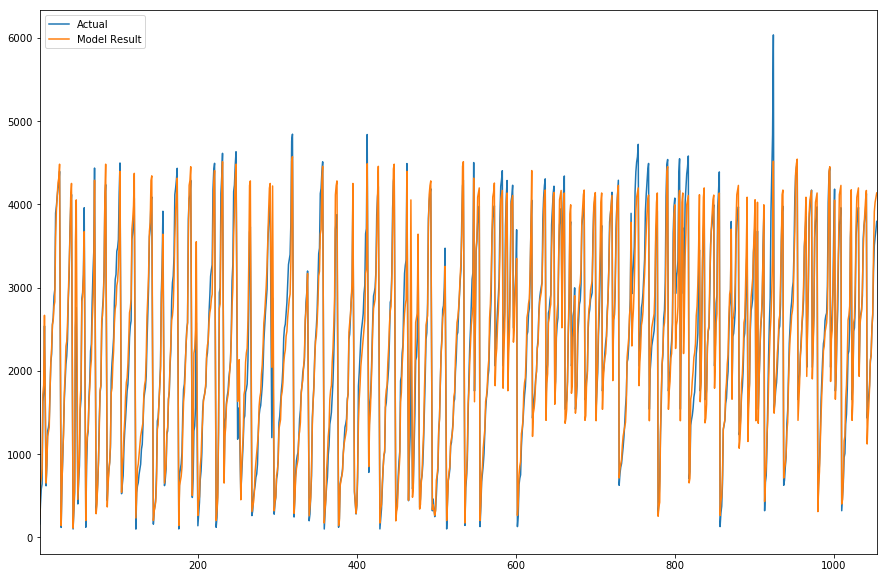

In [37]:
fig=a.plot(y=["Actual", "Model Result"], kind="line", figsize=(15,10))